In [2]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
from utils import constants as cnst
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from utils import u_grid, u_interpolate as u_int, u_darrays as uda

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/09/06/IR_wavelet_BT_20200906_*.nc'

In [10]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

In [11]:
data

<xarray.Dataset>
Dimensions:      (lat: 566, lon: 667, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2020-09-06
  * lat          (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon          (lon) float64 -19.0 -18.97 -18.95 ... -1.106 -1.079 -1.052
Data variables:
    small_scale  (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
    tir          (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
    dom          (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>

In [5]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(15,10))
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    ax.stock_img()
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree())
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.colorbar()
    plt.show()

In [12]:
tstep_old = data.isel(time=0).load() #-12

In [13]:
tstep_old

<xarray.Dataset>
Dimensions:      (lat: 566, lon: 667)
Coordinates:
    time         datetime64[ns] 2020-09-06
  * lat          (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon          (lon) float64 -19.0 -18.97 -18.95 ... -1.106 -1.079 -1.052
Data variables:
    small_scale  (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    tir          (lat, lon) int16 1882 1772 1782 1986 ... 2151 2191 2209 2220
    dom          (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

In [14]:
tir = tstep_old['tir']
tir.values = np.array(tir.values/100, dtype=float)
tir.values[tir.values>-60] = np.nan

In [15]:
msg_folder = cnst.TOPO_1MIN
topo = xr.open_dataarray(msg_folder)
topo = topo.sel(lon=slice(-19,-7), lat=slice(8,19))


In [18]:
tir.min()

<xarray.DataArray 'tir' ()>
array(-87.64)
Coordinates:
    time     datetime64[ns] 2020-09-06

/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


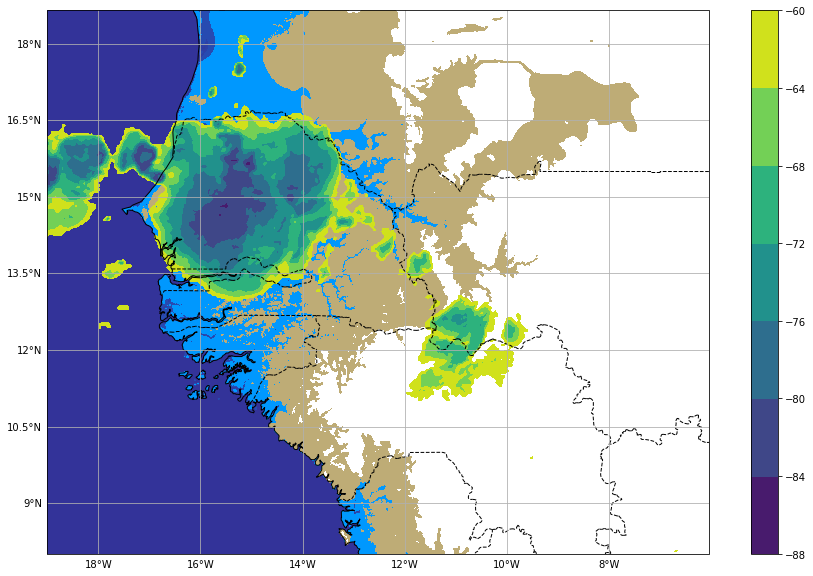

In [17]:
f=plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
ax.contourf(topo['lon'], topo['lat'],topo, transform=ccrs.PlateCarree(), cmap='terrain', levels=[0,1,2,3,4,5,10,50,200])
plt.contourf(tstep_old['lon'], tstep_old['lat'],tir, transform=ccrs.PlateCarree())
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
plt.show()
